<a href="https://colab.research.google.com/github/lschulte19/cluster-algorithm/blob/main/Trabalho_Final_Clusterizacao_Dados_Ladan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Biblioteca que vamos usar nesse projeto
from google.colab import drive
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


esse é o arquivo de requirements.txt
google-colab
pandas
seaborn
numpy
matplotlib
scikit-learn
scipy

# Parte 2
# **Q1**
Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

In [ ]:
# prompt: montar dois arquivos do drive aqui no colab

from google.colab import drive
drive.mount('/content/drive')
# Example: Accessing a specific file
with open('/content/drive/My Drive/Country-data.csv', 'r') as f:
   file_contents = f.read()
   print(file_contents)


Mounted at /content/drive
country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Afghanistan,90.2,10,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.1,76.5,2.89,4460
Angola,119,62.3,2.85,42.9,5900,22.4,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
Argentina,14.5,18.9,8.1,16,18700,20.9,75.8,2.37,10300
Armenia,18.1,20.8,4.4,45.3,6700,7.77,73.3,1.69,3220
Australia,4.8,19.8,8.73,20.9,41400,1.16,82,1.93,51900
Austria,4.3,51.3,11,47.8,43200,0.873,80.5,1.44,46900
Azerbaijan,39.2,54.3,5.88,20.7,16000,13.8,69.1,1.92,5840
Bahamas,13.8,35,7.89,43.7,22900,-0.393,73.8,1.86,28000
Bahrain,8.6,69.5,4.97,50.9,41100,7.44,76,2.16,20700
Bangladesh,49.4,16,3.52,21.8,2440,7.14,70.4,2.33,758
Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000
Belarus,5.5,51.4,5.61,64.5,16200,15.1,70.4,1.49,6030
Belgium,4.5,76.4,10.7,74.7,41100,1.88,80,1.86,44400
Belize,18.8,58.2,5.2


# Q2

Quantos países existem no dataset?

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Country-data.csv')
#df.head()
count_country = df['country'].nunique()
print(f"Essa é a quantidade de paises no dataset: {count_country}")


Essa é a quantidade de paises no dataset: 167


# Q3
Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


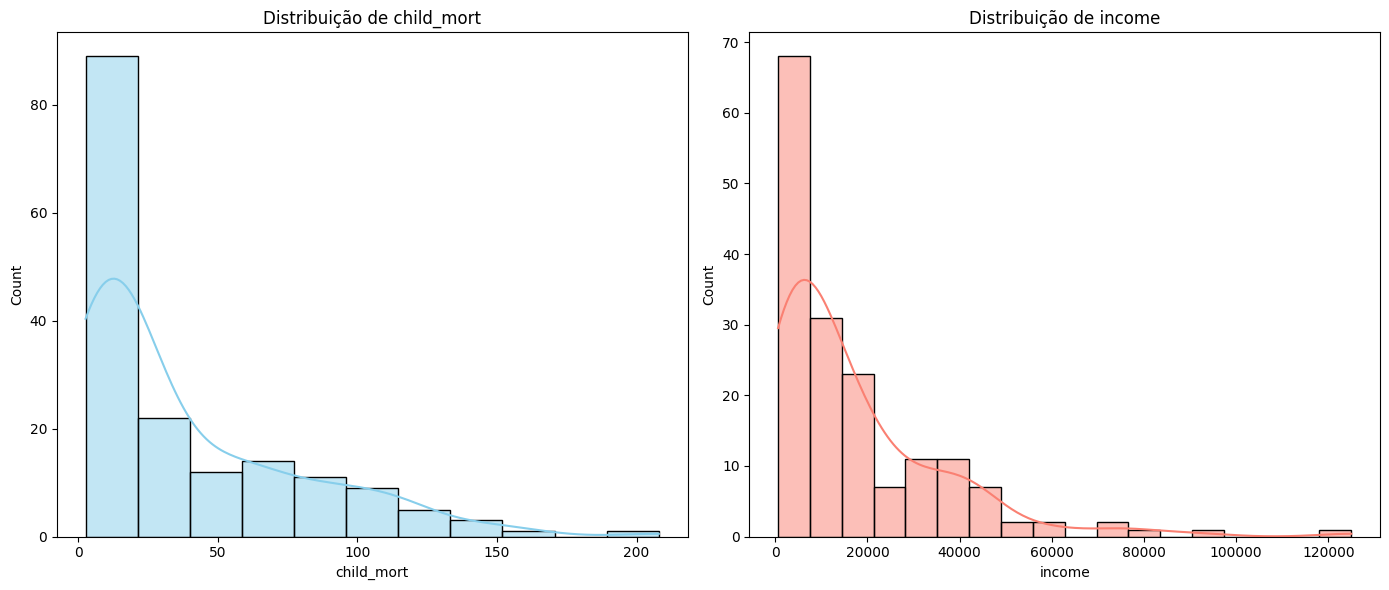

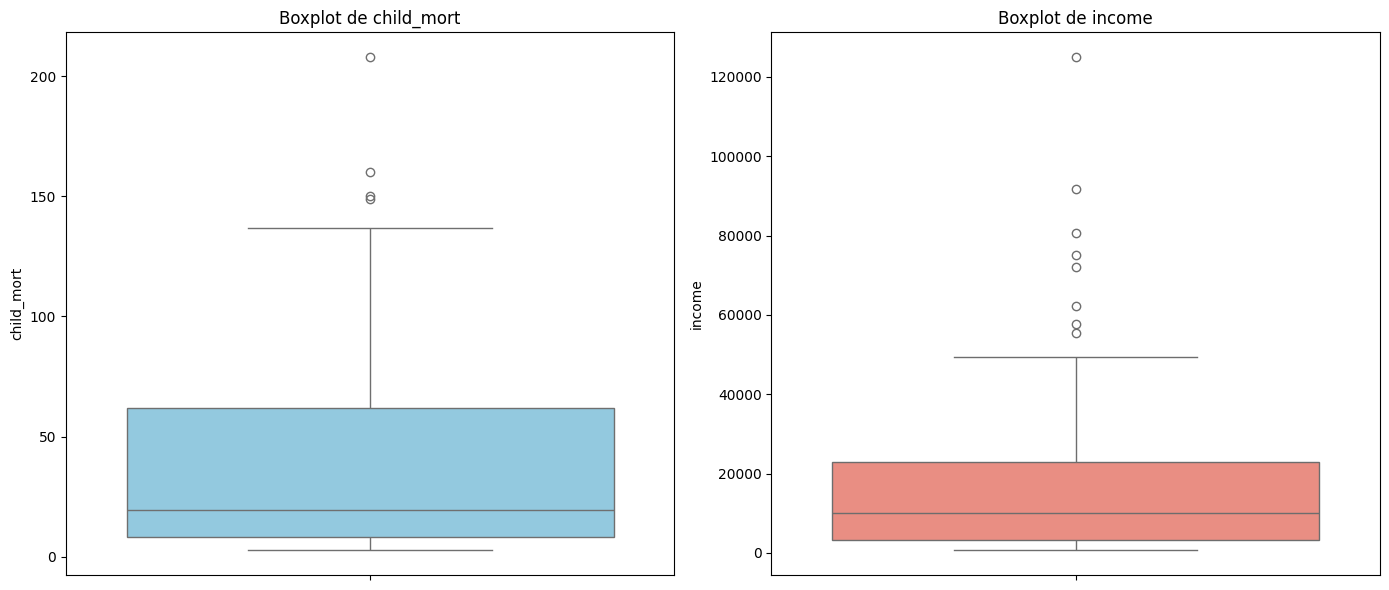

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df["child_mort"], kde=True, ax=axs[0], color="skyblue")
axs[0].set_title("Distribuição de child_mort")
sns.histplot(df["income"], kde=True, ax=axs[1], color="salmon")
axs[1].set_title("Distribuição de income")
plt.tight_layout()
plt.show()

# Boxplots para identificar outliers
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(y=df["child_mort"], ax=axs[0], color="skyblue")
axs[0].set_title("Boxplot de child_mort")
sns.boxplot(y=df["income"], ax=axs[1], color="salmon")
axs[1].set_title("Boxplot de income")

plt.tight_layout()
plt.show()

Vamos fazer um pre-processamento normalizando os dados (child_mort e income) e removendo os outliers


# Q4

Realize o pré-processamento adequado dos dados.

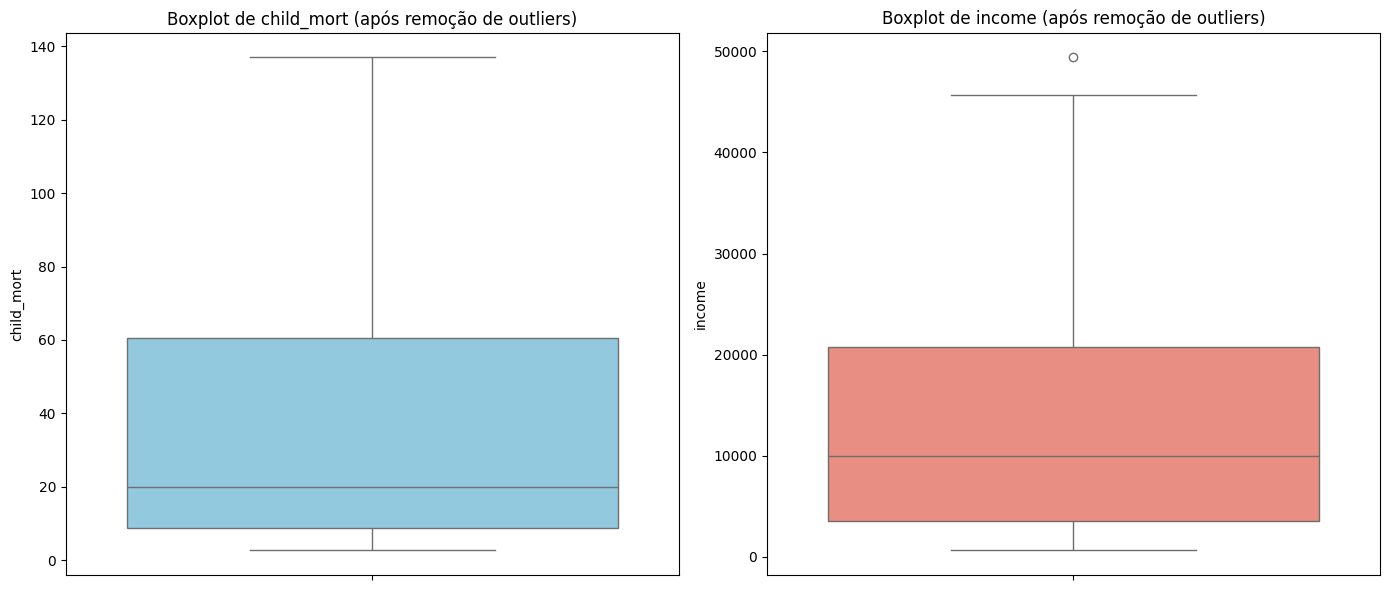

In [ ]:
def remover_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Remover outliers nas colunas 'child_mort' e 'income'
df = remover_outliers(df, "child_mort")
df = remover_outliers(df, "income")
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(y=df["child_mort"], ax=axs[0], color="skyblue")
axs[0].set_title("Boxplot de child_mort (após remoção de outliers)")

sns.boxplot(y=df["income"], ax=axs[1], color="salmon")
axs[1].set_title("Boxplot de income (após remoção de outliers)")

plt.tight_layout()
plt.show()

In [ ]:
# Normalizar os dados
scaler = MinMaxScaler()
df[["child_mort", "income"]] = scaler.fit_transform(df[["child_mort", "income"]])

print(df[["child_mort", "income"]].describe())

       child_mort      income
count  155.000000  155.000000
mean     0.252923    0.283398
std      0.263422    0.270409
min      0.000000    0.000000
25%      0.045015    0.060175
50%      0.127976    0.191039
75%      0.430060    0.412802
max      1.000000    1.000000


# Parte 3
# Q1
Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:
K-Médias
Clusterização Hierárquica

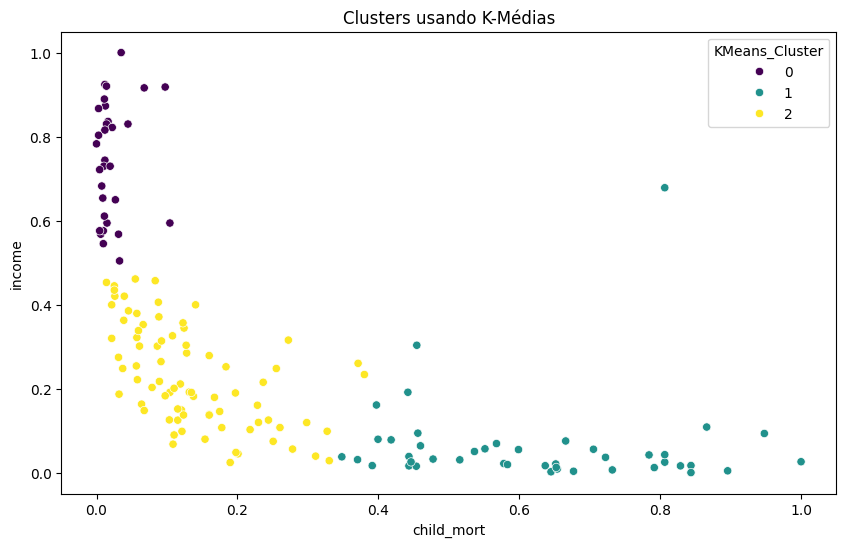

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['KMeans_Cluster'] = kmeans.fit_predict(df[["child_mort", "income"]])

# Visualização dos clusters K-Médias
plt.figure(figsize=(10, 6))
sns.scatterplot(x="child_mort", y="income", hue="KMeans_Cluster", data=df, palette="viridis")
plt.title("Clusters usando K-Médias")
plt.show()

Centroides (centros dos clusters):
[[0.0218894  0.7442019 ]
 [0.61658399 0.062384  ]
 [0.13643385 0.22847101]]


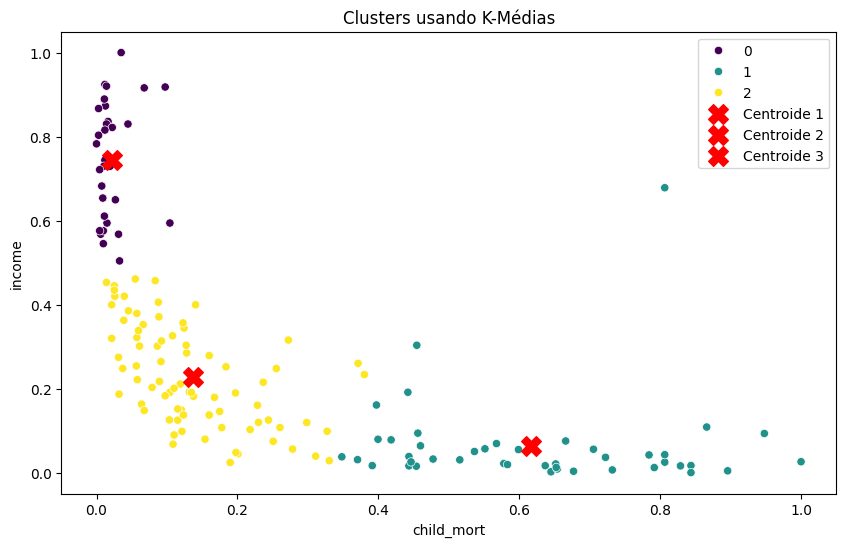

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)

df['KMeans_Cluster'] = kmeans.fit_predict(df[["child_mort", "income"]])

# Obtendo os centroides
centroides = kmeans.cluster_centers_
print("Centroides (centros dos clusters):")
print(centroides)

plt.figure(figsize=(10, 6))
sns.scatterplot(x="child_mort", y="income", hue="KMeans_Cluster", data=df, palette="viridis")

# Plotando os centroides
for i, centroide in enumerate(centroides):
    plt.scatter(centroide[0], centroide[1], marker='X', color='red', s=200, label=f'Centroide {i+1}')

plt.title("Clusters usando K-Médias")
plt.legend()
plt.show()

**Fazendo a clusterização hierarquica**

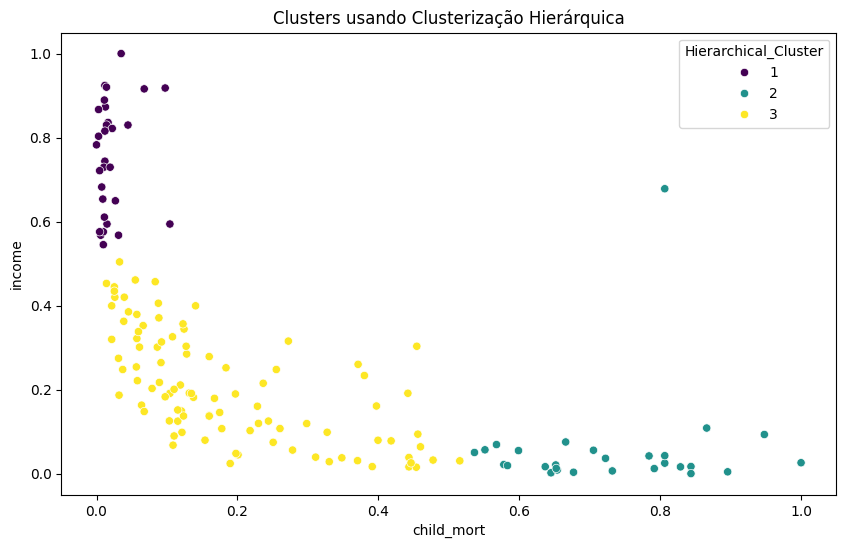

In [ ]:
# Clusterização Hierárquica
linkage_matrix = linkage(df[["child_mort", "income"]], method="ward")
df['Hierarchical_Cluster'] = fcluster(linkage_matrix, 3, criterion='maxclust')

# Visualização dos clusters Hierárquicos
plt.figure(figsize=(10, 6))
sns.scatterplot(x="child_mort", y="income", hue="Hierarchical_Cluster", data=df, palette="viridis")
plt.title("Clusters usando Clusterização Hierárquica")
plt.show()

In [ ]:
#Vamos comparar os resultados do k-means e da clusterização hierarquica pela silhueta, e na sequencia vamos interpretar



silhouette_kmeans = silhouette_score(df_scaled, df['KMeans_Cluster'])
print(f"Índice de Silhueta (K-means): {silhouette_kmeans}")

# Calculando o índice de silhueta para a clusterização hierárquica
silhouette_hierarchical = silhouette_score(df_scaled, df['Hierarchical_Cluster'])
print(f"Índice de Silhueta (Hierárquica): {silhouette_hierarchical}")

Índice de Silhueta (K-means): 0.5569354023241216
Índice de Silhueta (Hierárquica): 0.5234463530578487


In [ ]:
# Valor alto de silhueta (próximo de 1) indica que os clusters estão bem definidos
# Valores próximos de 0 indicam que os clusters estão sobrepondo-se
# Valores negativos indicam que os pontos podem estar no cluster errado

#Assim nesse nosso dataset com o k=3 o k-means é melhor que o hierárquica

# Q2
Para os resultados, do K-Médias:
Interprete cada um dos clusters obtidos citando:
Qual a distribuição das dimensões em cada grupo
O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique

A distribuição de cada grupo podemos achar a média ou o desvio padrão de cada cluster e entcontrar o melhor pais que representa cada um, e a distruibção das dimensões são child_mort e income, então vamos calcular:

In [ ]:

# Adicionar o centróide de cada cluster no DataFrame
df['Distance_to_Centroid'] = np.linalg.norm(
    df[["child_mort", "income"]].values - kmeans.cluster_centers_[df['KMeans_Cluster']], axis=1
)

# Estatísticas descritivas por cluster
cluster_stats = df.groupby('KMeans_Cluster')[["child_mort", "income"]].describe()
print("Estatísticas descritivas por cluster:")
#Vamos observar os valores de cada cluster das dimensões de child_mort e income
print(cluster_stats)

# País mais representativo de cada cluster
representative_countries = df.loc[df.groupby('KMeans_Cluster')['Distance_to_Centroid'].idxmin()]
print("\nPaís representativo de cada cluster:")
print(representative_countries[['country', 'KMeans_Cluster', 'child_mort', 'income']])

#Cluster 2 pode conter países com altas taxas de mortalidade infantil e baixa renda.
#Cluster 3 pode representar países de renda média e mortalidade moderada.
#Cluster 1 pode ter países com alta renda e baixa mortalidade.

Estatísticas descritivas por cluster:
               child_mort                                                    \
                    count      mean       std       min       25%       50%   
KMeans_Cluster                                                                
0                    31.0  0.021889  0.025287  0.000000  0.009301  0.011905   
1                    45.0  0.616584  0.176482  0.348214  0.453869  0.598958   
2                    79.0  0.136434  0.089066  0.014137  0.065104  0.119048   

                                   income                                \
                     75%       max  count      mean       std       min   
KMeans_Cluster                                                            
0               0.024554  0.104167   31.0  0.744202  0.139245  0.504007   
1               0.784226  1.000000   45.0  0.062384  0.109080  0.000000   
2               0.186756  0.380208   79.0  0.228471  0.120705  0.024000   

                                    


# Q3
Dendograma da clusterização hierarquica

---



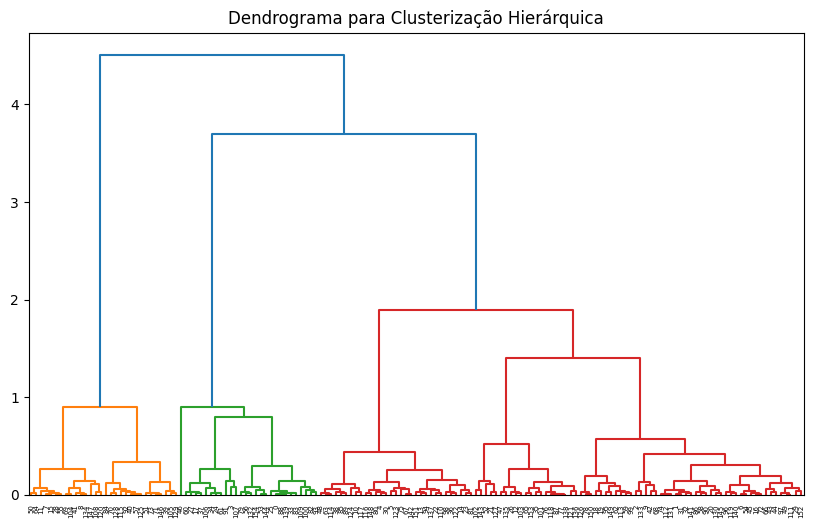

In [ ]:
# Visualização do Dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Dendrograma para Clusterização Hierárquica")
plt.show()

In [ ]:
cluster_stats = df.groupby('Hierarchical_Cluster')[["child_mort", "income"]].describe()
print("Estatísticas descritivas por cluster:")
#Vamos observar os valores de cada cluster das dimensões de child_mort e income
print(cluster_stats)


#Notamos que se formou 4 clusters, pois o corte do dendograma foi feito na altura que gerou 4 clusters

Estatísticas descritivas por cluster:
                     child_mort                                          \
                          count      mean       std       min       25%   
Hierarchical_Cluster                                                      
1                          30.0  0.021528  0.025638  0.000000  0.009115   
2                          28.0  0.727891  0.125471  0.536458  0.643043   
3                          97.0  0.187385  0.140776  0.014137  0.083333   

                                                   income                      \
                           50%       75%       max  count      mean       std   
Hierarchical_Cluster                                                            
1                     0.011905  0.021577  0.104167   30.0  0.752208  0.134171   
2                     0.713914  0.812128  1.000000   28.0  0.056131  0.125183   
3                     0.131696  0.272321  0.515625   97.0  0.204009  0.131672   

                        

In [ ]:
cluster_counts = df['Hierarchical_Cluster'].value_counts()
print("Quantidade de países em cada cluster:")
print(cluster_counts)

#Ficou mais equilibrado os cluster, pois usando o k-means ficamos com um cluster tendo 166 paises

Quantidade de países em cada cluster:
Hierarchical_Cluster
3    97
1    30
2    28
Name: count, dtype: int64


# PARTE 4

# Q1
Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.


In [ ]:
#Etapas do algoritmo k-means até sua convergencia

# 1 - Primeiro passo é você escolher o númeor de cluster
# 2 - O algortimo irá aleatoriamente escolher uma centroide para cada cluster (se k=3 vamos ter 3 centroides aleatorias)
# 3 - Agora com as centroides de cada cluster geradas o algoritmo irá calcular a distancia euclidiana para cada ponto próximo a centroide
# 4 - Nessa etapa irá ser recalculada a centroide, pela média dos pontos próximos
# 5 - Com uma "nova" centroide se calcula novamente a distancia euclidiano para cada ponto
# 6 - Se recalcula a variancia da centroide e a posiciona novamente
# 7 - O algorimo para quando as centróides convergirem (ou seja, não se movimentarem significativamente) ou quando o número máximo de iterações for atingido, caso as centróides não converjam antes disso


# **Q2 e Q3**
O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.
Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.

O algoritmo de K-médias é sensível a outliers nos dados. Explique.

In [ ]:
#O k-Medoids tem uma diferença entre o k-Means na parte inicial, pois enquanto no k-means as centroides são posicionadas de forma aleatoria os medóides é um valor real do seu dataset. Os etapas são bem parecidas

# 1 - Defina quantos clusters você deseja criar
# 2 - Inicializando os medóides é feito por escolha aleatoriamente k (quantidade de cluster) pontos do dataset como os medóides iniciais
# 3 - Para cada ponto do dataset, calcule a distância euclidiana (ou outra métrica de distância) até cada medóide
# 4 - Atribua o ponto ao cluster cujo medóide está mais próximo
# 5 - Para cada cluster, escolha o ponto dentro do cluster que minimiza a soma das distâncias a todos os outros pontos do mesmo cluster
# 6 - Repita esse processo até que os medóides não mudem mais (convergência), ou o número máximo de iterações definido seja atingido.




#Garantiando assim maior robustez contra os outliers, pois o medóides são sempre um valor real e as centroides podem ser influenciados por valores extremos

# Q4
Por que o algoritmo de DBScan é mais robusto à presença de outliers?


In [ ]:
#Pois no DBScan ele sempre vai começar em um ponto não visitado do nosso dataset e todos os pontos dentro de uma distancia Ɛ são classificados como vizinhos/neighborhood
#Podemos garantir um número mínimo de pontos na vizinhança para iniciar o processo de clustering, se atingida essas circuntâncias esse ponto será o primeiro ponto do nosso cluster
#Porém caso não se forme esse ponto será considerado um outliers e não irá formar o cluster, podemos notar então que no algoritomo de DBScan sempre vai precisar termos pontos próximos para ir formando o cluster e quaisquer ponto fora será "descartado"

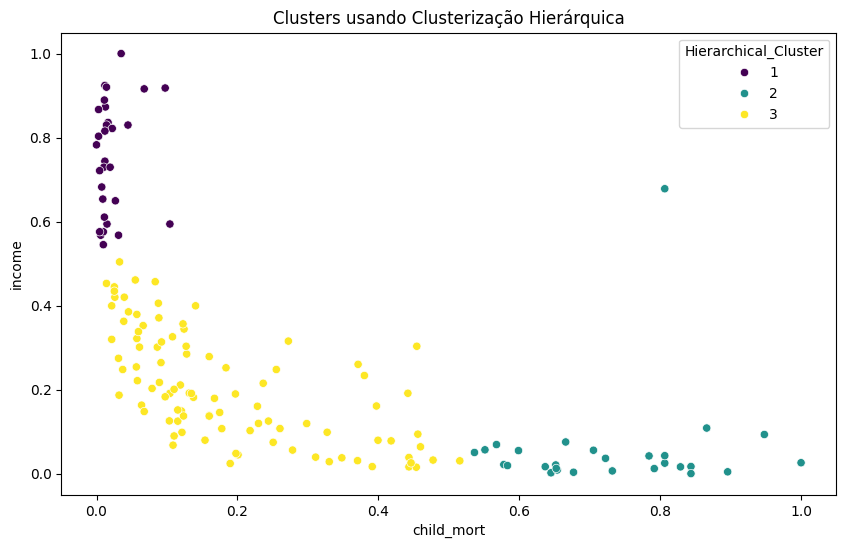

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="child_mort", y="income", hue="Hierarchical_Cluster", data=df, palette="viridis")
plt.title("Clusters usando Clusterização Hierárquica")
plt.show()

#Para nível de teste vamos printar novamente a vizualização da clusterização hierarquica, podemos notar um ponto no cluster 2 muito fora do seu cluster (com income > 6)
#Vamos rodar um DBscan com eps=0.5 e com mínimo 5 pontos de vizinhaça para vermos quem está fora do cluster

<ipython-input-22-daa2991a6b53>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("viridis", len(unique_labels))


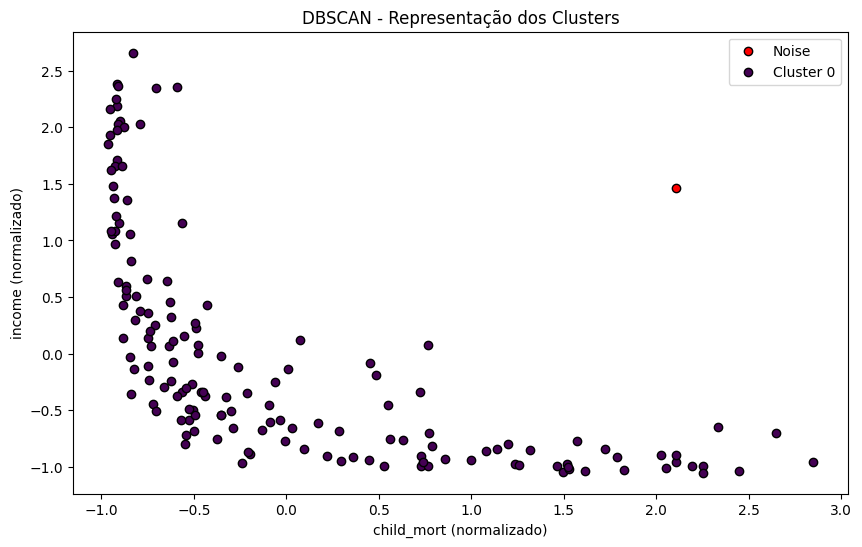

In [ ]:


data = df[["child_mort", "income"]].values

# Normalizar os dados para que estejam na mesma escala
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplicar o DBSCAN
# eps: raio de vizinhança máxima, min_samples: número mínimo de pontos para formar um cluster
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(data_scaled)

df["DBSCAN_Cluster"] = clusters

# Visualização dos clusters
plt.figure(figsize=(10, 6))

# Rótulos únicos de cluster
unique_labels = np.unique(clusters)

# Paleta de cores
colors = plt.cm.get_cmap("viridis", len(unique_labels))

for label in unique_labels:
    # Selecionar pontos do cluster
    cluster_points = data_scaled[clusters == label]

    # Atribuir cor para cada cluster
    if label == -1:  # Ruído (outliers)
        color = "red"
        label_name = "Noise"
    else:
        color = colors(label)
        label_name = f"Cluster {label}"

    # Plotar os pontos do cluster
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        color=color,
        label=label_name,
        edgecolor="k",
    )

plt.title("DBSCAN - Representação dos Clusters")
plt.xlabel("child_mort (normalizado)")
plt.ylabel("income (normalizado)")
plt.legend(loc="best")
plt.show()

In [ ]:
# Colocando o epsilon igual a 0,5 notamos que se formou apenas um cluster (podemos ir alterando esse valor), porém aquele ponto que havia comentado é um ruido dentro do nosso dataset